In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pdIris = pd.read_csv('Iris.csv')

with open('Iris.csv','r') as f:
    data = f.read()
result = [x.strip() for x in data.replace('\n',',').split(',')][:-1:]
result = result
irispd = pd.DataFrame({result[0]:result[6::6],
                       result[1]:result[7::6],
                       result[2]:result[8::6],
                       result[3]:result[9::6],
                       result[4]:result[10::6],
                       result[5]:result[11::6]})



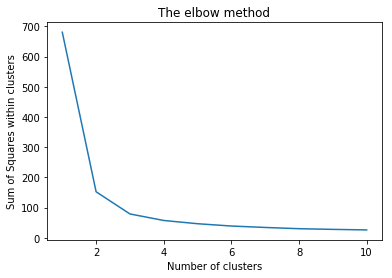

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [39]:
x = pdIris.drop(['Id','Species'], axis=1)
# Select values and convert dataframe to array
x = x.values
# Finding the optimal value for k
from sklearn.cluster import KMeans
# Sum of squared distances between the datapoints within the clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting results onto line graph to identify the "elbow"
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares within clusters')
plt.show()

from sklearn.metrics import silhouette_score
range_n_clusters = list (range(1,4))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_
    score = silhouette_score (x, preds, metric='euclidean')
    print ("For n_clusters = {}, the silhouette score is {:.2f}".format(n_clusters, score))



No handles with labels found to put in legend.


0.33380799465469013


C:\Users\demo\Miniconda3\envs\condaenv\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


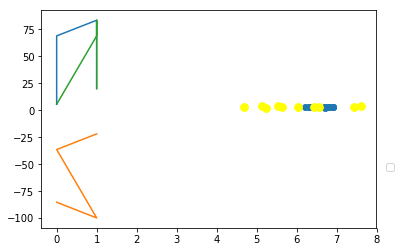

In [41]:
y_kmeans = kmeans.fit_predict(x)
score = silhouette_score (x, y_kmeans, metric='euclidean')
print(score)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1])
# Add the color to each cluster and the labels. Find the date from the pyplot documentation: c is the colour and label indicated the label.
plt.legend(bbox_to_anchor=(1.03, 0.3), loc='upper left', borderaxespad=0.)
# If you want to have the legend out of the plot.
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 60, c = 'yellow', label ='Centroids')

import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.plot(X,X_embedded)